In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset= pd.read_csv('./Student_Performance.csv')
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
dataset.shape

(10000, 6)

In [7]:
dataset.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [3]:
dataset['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dataset['Extracurricular Activities'] = label.fit_transform(dataset['Extracurricular Activities'])


In [9]:
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


<BarContainer object of 10000 artists>

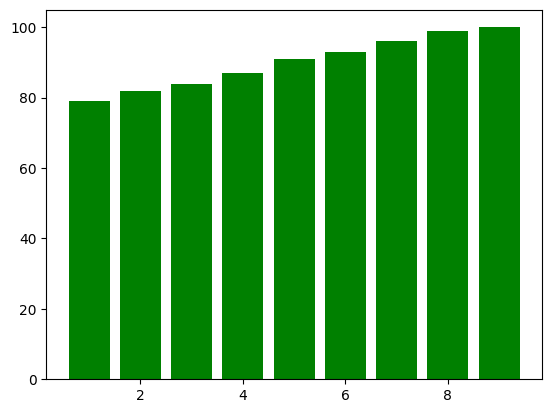

In [12]:

plt.bar(dataset['Hours Studied'],dataset['Performance Index'],color='green')

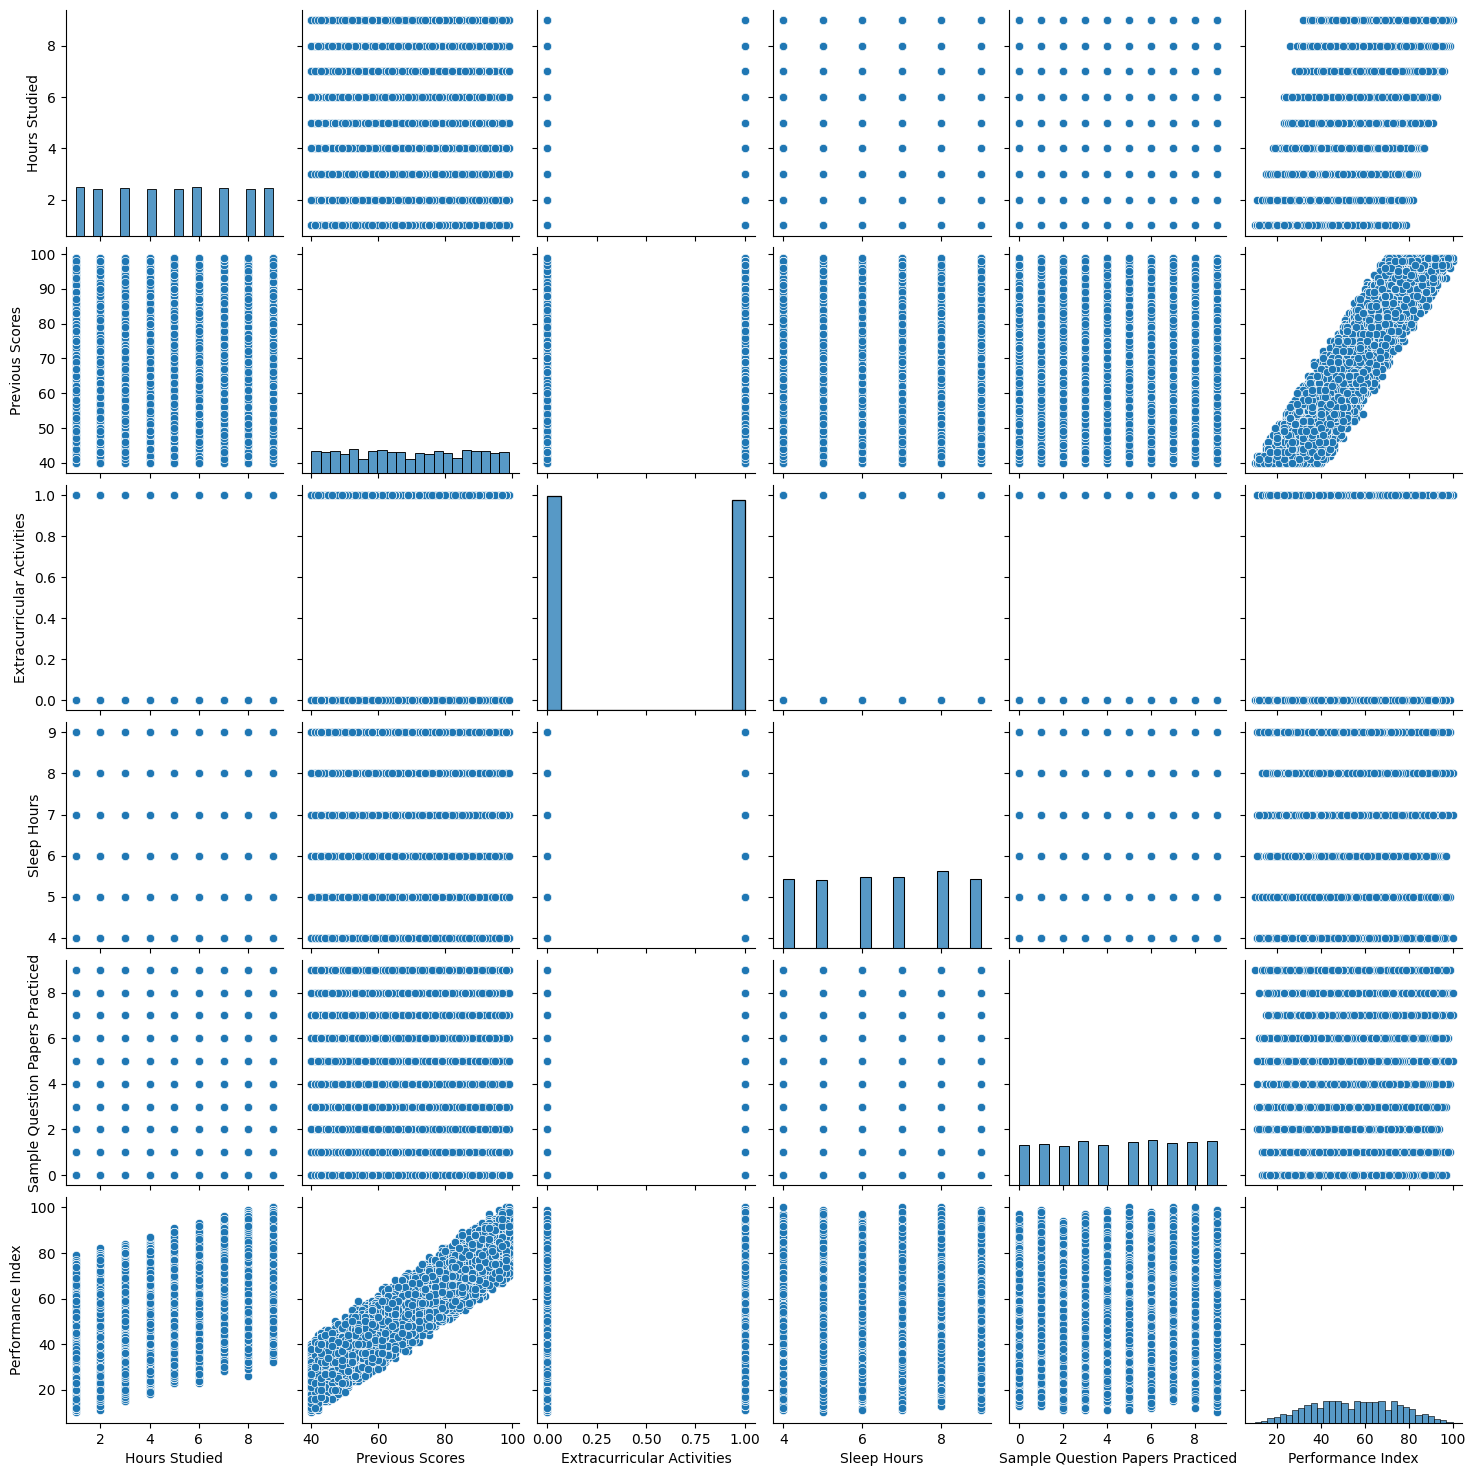

In [13]:
import  seaborn as sns
sns.pairplot(dataset)

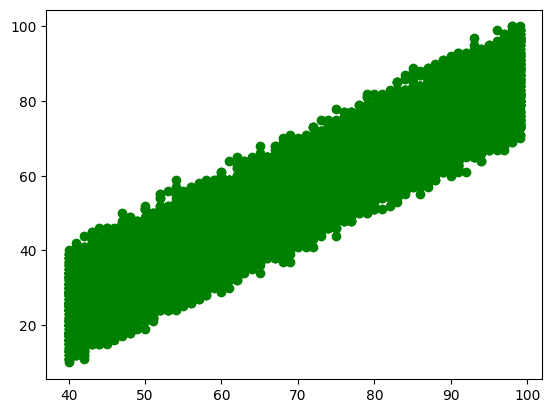

In [14]:

plt.scatter(dataset['Previous Scores'],dataset['Performance Index'],c='green')

In [ ]:
# Training the dataset into train and test 

In [15]:
X = dataset.drop(columns='Performance Index',axis=1)
y = dataset['Performance Index']


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((8000, 5), (2000, 5), (8000,), (2000,))

In [21]:
from sklearn.linear_model import LinearRegression
label = LinearRegression()
label

LinearRegression()

In [22]:
label.fit(X_train, Y_train)
y_pred = label.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.082628398521854
R-squared: 0.9889832909573145


In [25]:
accuracy_percentage = r2*100
accuracy_percentage

98.89832909573146

In [26]:
X.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

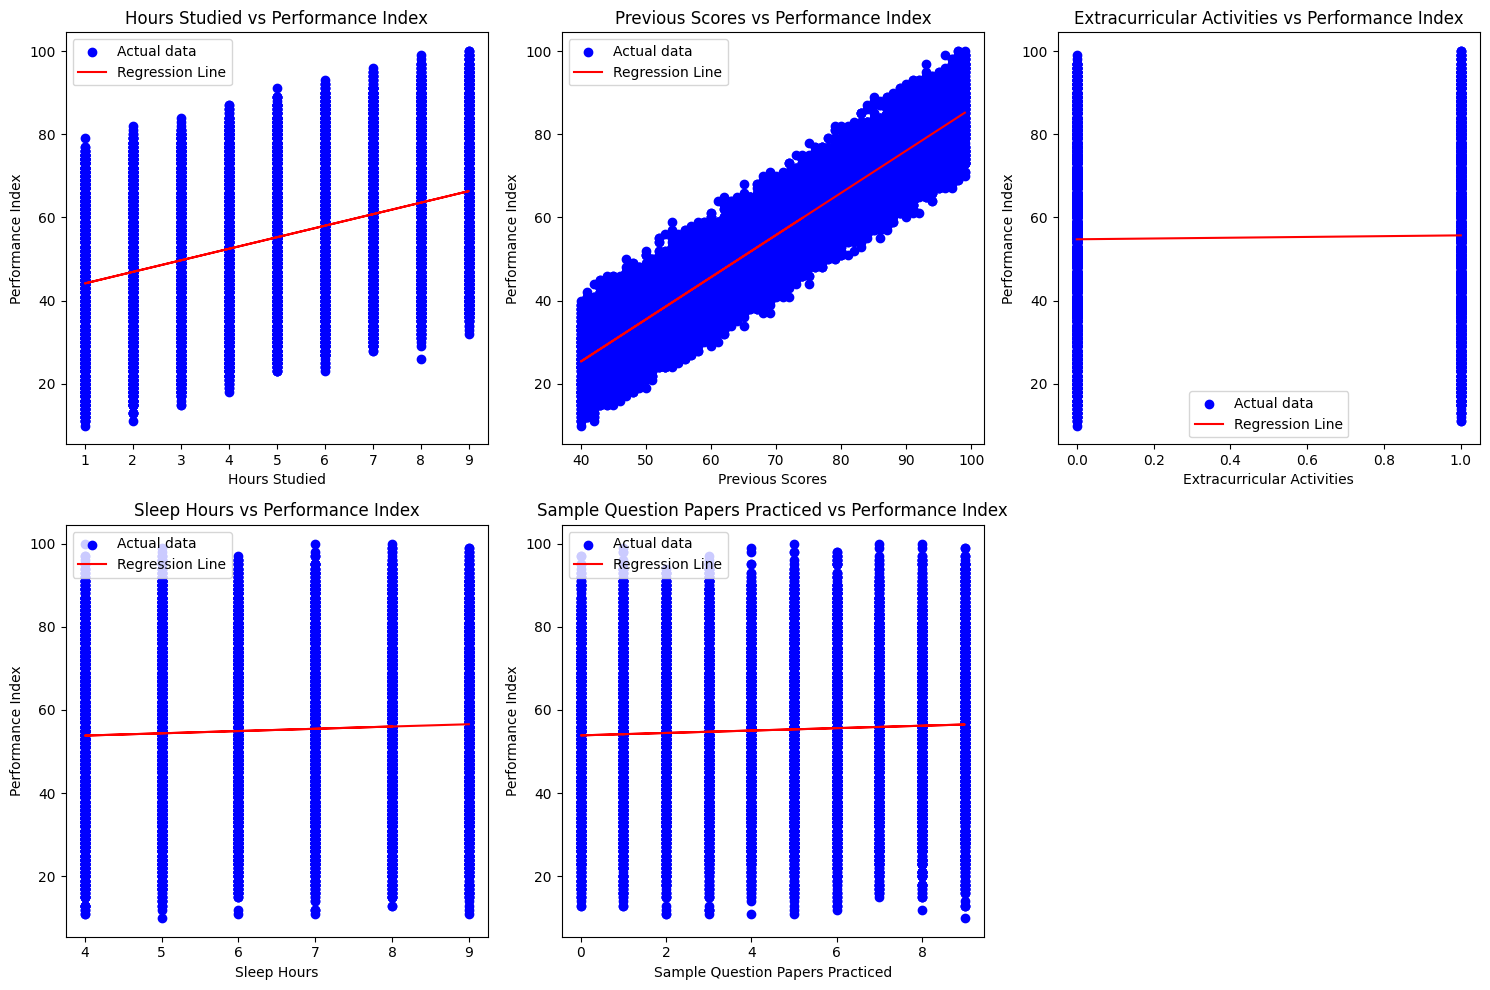

In [27]:

features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']  
target = 'Performance Index'
fig, axs = plt.subplots(2, 3, figsize=(15, 10)) 
axs = axs.ravel() 
for i, feature in enumerate(features):
    X_feature = dataset[[feature]] 
    label.fit(X_feature, dataset[target])
    y_pred = label.predict(X_feature)
    axs[i].scatter(X_feature, dataset[target], color='blue', label='Actual data')
    axs[i].plot(X_feature, y_pred, color='red', label='Regression Line')
    axs[i].set_title(f'{feature} vs {target}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel(target)
    axs[i].legend()
fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()


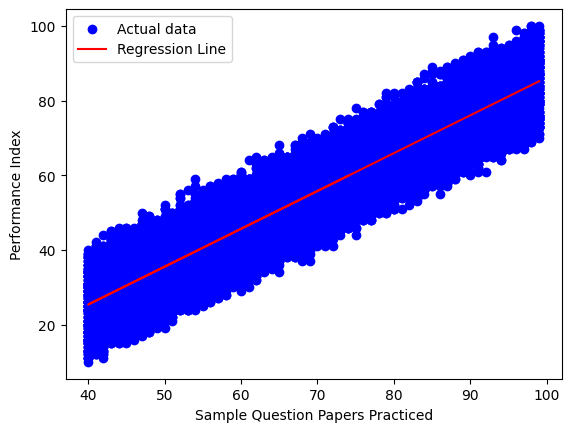

In [29]:
X_feature = dataset[['Previous Scores']]  
label.fit(X_feature, dataset[target]) 
y_pred = label.predict(X_feature) 
plt.scatter(X_feature, dataset[target], color='blue', label='Actual data')

plt.plot(X_feature, y_pred, color='red', label='Regression Line')

plt.xlabel(feature)
plt.ylabel(target)
plt.legend()
plt.show()
